In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

defunciones = pd.read_csv('defunciones_clean.csv')


# Tendencias Temporales:
# 1. ¿Cómo ha evolucionado la tasa de mortalidad general a lo largo de los años?

df = pd.read_csv('defunciones_clean.csv') # Cargar los datos limpios

df['año_registrado'] = df['año_registrado'].astype(int) # Asegurarse de que 'año_registrado' es del tipo correcto

defunciones_por_año = df.groupby('año_registrado').size() # Contar el número de defunciones por año

# Graficar la tasa de mortalidad por año
plt.figure(figsize=(10, 6))
defunciones_por_año.plot(kind='bar')
plt.title('Tasa de Mortalidad por Año')
plt.xlabel('Año Registrado')
plt.ylabel('Número de Defunciones')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()



C:\Users\halm9\AppData\Local\Temp\ipykernel_21000\2334168816.py:10: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('defunciones_clean.csv')


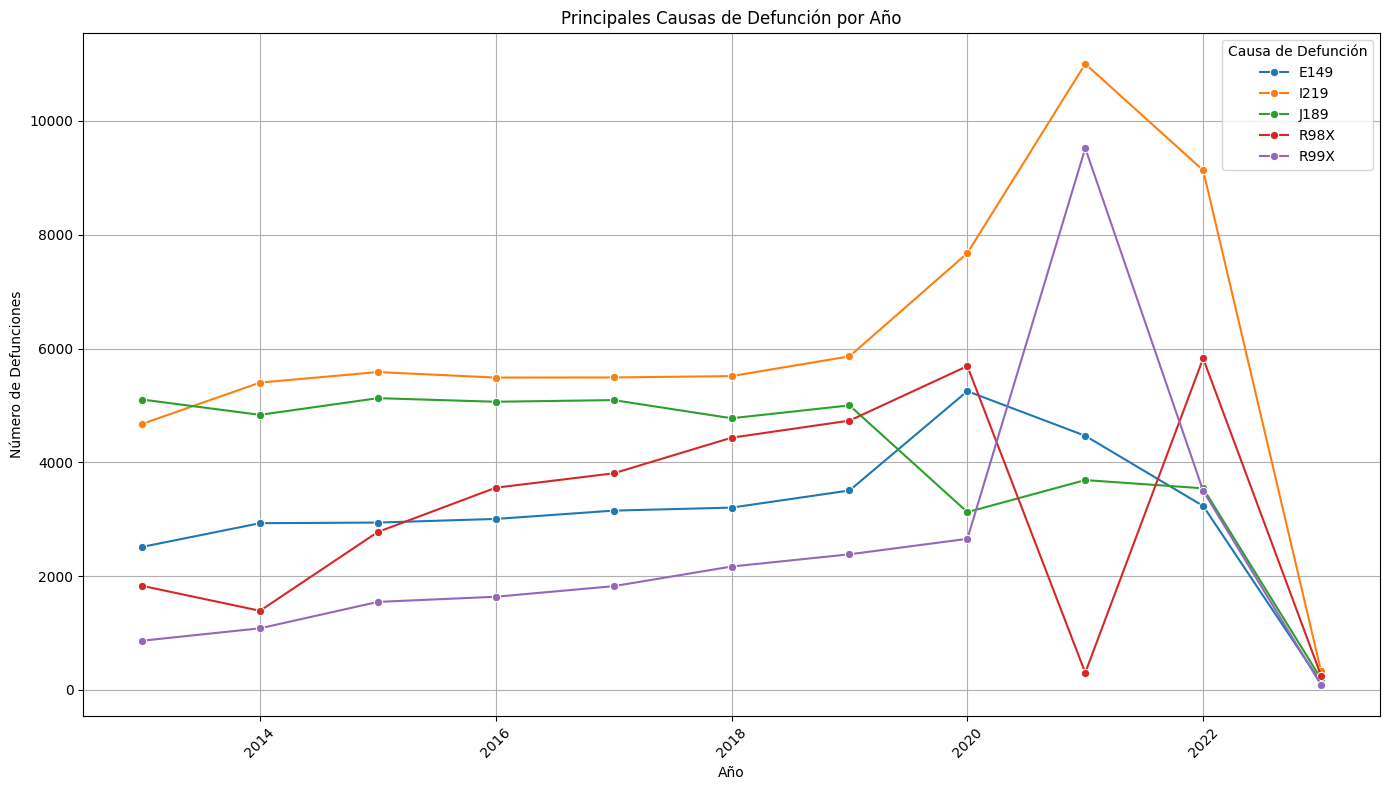

In [5]:
# Causas de Defunción:
# 2. ¿Cuáles son las principales causas de defunción registradas cada año?
# Paso 1: Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el DataFrame de defunciones desde 'defunciones_clean.csv'
df = pd.read_csv('defunciones_clean.csv')

# Cargar el mapeo de Código CIE-10 desde 'CIE.csv'
cie_10_df = pd.read_csv('CIE.csv')

# Crear el diccionario de mapeo para CIE-10
cie_10_mapeo = pd.Series(cie_10_df['descripcion'].values, index=cie_10_df['codigo'].astype(str)).to_dict()

# Asegúrate de que la columna con los códigos CIE-10 es del tipo correcto (str)
# Ajusta 'codigo_cie_10' al nombre real de tu columna que contiene los códigos CIE-10
df['causa'] = df['causa'].astype(str)

# Reemplazar los códigos CIE-10 por descripciones usando el mapeo
df['Descripción'] = df['causa'].map(cie_10_mapeo)

# Seleccionar el año de interés para el análisis, por ejemplo, el más reciente en tus datos
año_especifico = df['año_registrado'].max()

# Agrupar por año y descripción CIE-10, contar el número de defunciones
defunciones_por_año_causa = df.groupby(['año_registrado', 'causa']).size().reset_index(name='conteo')

# Para simplificar, puedes seleccionar las N causas más comunes en general o hacerlo por año
# Aquí, seleccionaremos las 5 causas más comunes en general para visualización
top_causas = defunciones_por_año_causa.groupby('causa')['conteo'].sum().nlargest(5).index

# Filtrar solo las filas que corresponden a las top causas
defunciones_top_causas = defunciones_por_año_causa[defunciones_por_año_causa['causa'].isin(top_causas)]

# Crear un gráfico de líneas o un gráfico de barras apiladas para visualizar las tendencias
plt.figure(figsize=(14, 8))
sns.lineplot(data=defunciones_top_causas, x='año_registrado', y='conteo', hue='causa', marker='o')
plt.title('Principales Causas de Defunción por Año')
plt.xlabel('Año')
plt.ylabel('Número de Defunciones')
plt.legend(title='Causa de Defunción')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()





In [ ]:
# Causas de Defunción:
# 3. ¿Ha habido cambios significativos en las principales causas de defunción a lo largo del tiempo?

# Definir los límites de los grupos de edad
bins = [0, 14, 24, 64, float('inf')]
labels = ['Infancia (0-14)', 'Juventud (15-24)', 'Adultez (25-64)', 'Mayores (65+)']

# Crear una nueva columna 'grupo_edad' en el dataframe
df['grupo_edad'] = pd.cut(df['edad'], bins=bins, labels=labels, right=False)

df.head()

# Agrupar por grupo de edad y causa de defunción, y contar el número de defunciones
defunciones_por_grupo_causa = df.groupby(['grupo_edad', 'causa_descripcion']).size().reset_index(name='conteo')

# Para cada grupo de edad, encontrar las causas de defunción más comunes
grupos_edad = defunciones_por_grupo_causa['grupo_edad'].unique()
for grupo in grupos_edad:
    print(f"\nGrupo de edad: {grupo}")
    defunciones_grupo = defunciones_por_grupo_causa[defunciones_por_grupo_causa['grupo_edad'] == grupo]
    defunciones_grupo = defunciones_grupo.sort_values(by='conteo', ascending=False).head(10)
    print(defunciones_grupo)

